### Guided Practice: Logit Function and Odds

In [16]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return None

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return None

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [18]:
lm = LogisticRegression()

df = pd.read_csv('../dataset/collegeadmissions.csv')

In [19]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [20]:
# in the past we might make another dataframe and then join such as
# temp_df = pd.get_dummies(df['rank'], prefix = 'rank')
df = df.join(pd.get_dummies(df['rank'], prefix = 'rank'))

In [21]:
df.head()

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [22]:
x = df[['gre','gpa','rank_1','rank_2','rank_3']]
y = df['admit']
lm.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
import numpy as np

In [24]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[  1.63913356e-03   4.33355414e-04   1.15220976e+00   5.14395668e-01
   -3.62326166e-02]]
[-2.09315184]
0.3175


In [25]:
# increasing GRE by 1 unit, what does it do to admission?
np.exp(lm.coef_)

array([[ 1.00164048,  1.00043345,  3.16517946,  1.67262737,  0.96441593]])

Therefore increase the GRE, GPA, etc by one, in turn multiply the odds (not probability) of admittance by these respective numbers.  For example, odds of admittance increase by a factor of 1.00164048 when increase GRE by 1.
Also, the odds of someone going to rank_1 is greater by a factor of 3.16517946 compared to rank_4 (***CLARIFY THIS, ASK)

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

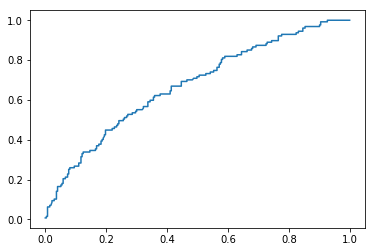

In [28]:
feature_set = df[['gre','gpa','rank_1','rank_2','rank_3']]
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

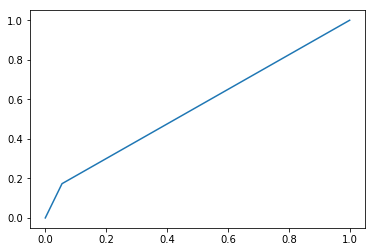

In [29]:
#what would happen if accidentally used the actual and not the probability values
#can see that it's one point connected to origin and (1,1)
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [31]:
roc_auc_score(df['admit'], probas[:,1])

0.6720746445155894

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [32]:
titanic_data = pd.read_csv('../dataset/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
print "Unique sibling values:", titanic_data.SibSp.unique()
print "Unique children values:", titanic_data.Parch.unique()
print "Unique embarked:", titanic_data.Embarked.value_counts()

Unique sibling values: [1 0 3 4 2 5 8]
Unique children values: [0 1 2 5 3 4 6]
Unique embarked: S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [34]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
cols_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
model_data = titanic_data[cols_to_keep].copy()

In [37]:
print len(model_data)
print model_data.isnull().sum()

891
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64


In [40]:
#bfill fills in missing values via backfill
model_data.Age = model_data.Age.fillna(method='bfill')

In [41]:
#can now see that there is no more missing data
print model_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64


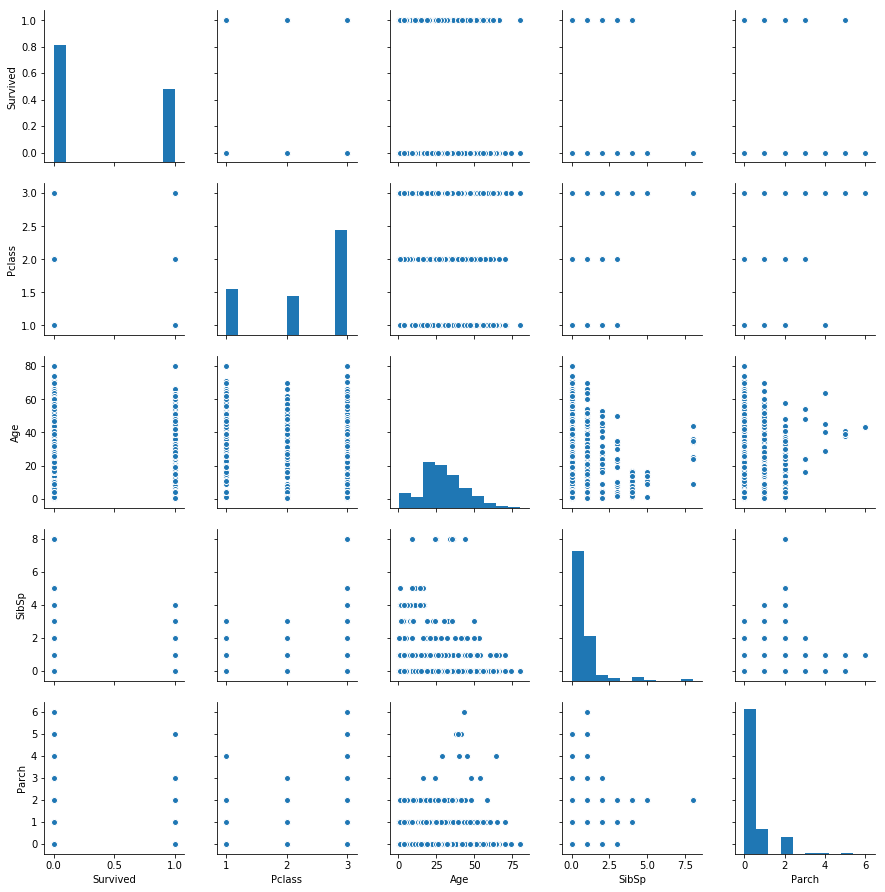

In [42]:
import seaborn as sns
sns.pairplot(model_data)

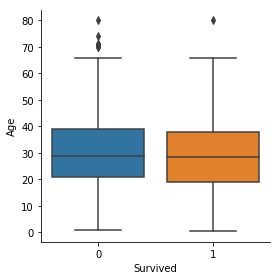

In [44]:
#basically can't just use a pairplot
sns.factorplot(kind='box', data=model_data, x = 'Survived', y = 'Age')

In [48]:
#use lambda to make single line function
model_data['isSibling'] = model_data['SibSp'].apply(lambda x: int(x > 0))
model_data['isChild'] = model_data['Parch'].apply(lambda x: int(x > 0))

In [49]:
model_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,isSibling,isChild
0,0,3,male,22.0,1,0,1,0
1,1,1,female,38.0,1,0,1,0
2,1,3,female,26.0,0,0,0,0
3,1,1,female,35.0,1,0,1,0
4,0,3,male,35.0,0,0,0,0


In [53]:
#get dummies for sex, drop one of the columns to just get one but can take out the last argument to see both
pd.get_dummies(data = model_data, columns=['Sex','Pclass'], drop_first = True)
#now reassign the data
model_data = pd.get_dummies(data = model_data, columns=['Sex','Pclass'], drop_first = True)
model_data.head()

,Survived,Age,SibSp,Parch,isSibling,isChild,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,0,1
3,1,35.0,1,0,1,0,0,0,0
4,0,35.0,0,0,0,0,1,0,1


In [54]:
features_to_use = ['Age', 'isSibling', 'isChild', 'Sex_male', 'Pclass_2', 'Pclass_3']
X = model_data[features_to_use]
Y = model_data.Survived

In [61]:
lm = LogisticRegression(C=1e12)
#saying C is equal to 10^12
lm.fit(X,Y)

LogisticRegression(C=1e+12, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
#so now we have a model, let's compute the exponentials for the coefficients
print np.exp(lm.coef_)

[[ 0.9731953   0.8748615   0.95653672  0.06963845  0.34044606  0.10433397]]


This means that someone in Pclass_3 has survival odds of e^0.14447475 times that of someone in Pclass_1.  If the exponents were greater than 1 then the odds of survival would be better; if exponents are less than 1 then the odds of survival decrease.

In [63]:
#this will give the accuracy
print lm.score(X,Y)

0.784511784512


This tells us that we can predict survival about 80% of the time

In [64]:
probas = lm.predict_proba(X)
roc_auc_score(Y, probas[:,1])

0.84689334142886052

Area under the curve in 0.85

In [65]:
#now we want to compare the coefficients with those found in statsmodels
print lm.coef_

[[-0.0271705  -0.13368969 -0.0444361  -2.66443847 -1.07749857 -2.26015825]]


SciKit Learn applies regularization (particularly inverse regularization strength)

In [66]:
import statsmodels.api as sm
slm = sm.Logit(endog=Y, exog=sm.add_constant(X)).fit

/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
